In [77]:
import numpy as np
import pandas as pd

In [78]:
train_data = pd.read_csv('customer_train.csv')
test_data = pd.read_csv('customer_test.csv')

In [79]:
train_data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [80]:
train_data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [82]:
def replace_nan_with_mode(column_names):
    global train_data
    for column_name in column_names:
        mode_value = train_data[column_name].mode()[0]
        train_data[column_name] = train_data[column_name].fillna(mode_value)
    return

li = ["Ever_Married","Graduated","Profession","Family_Size","Var_1","Work_Experience"]
replace_nan_with_mode(li)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [83]:
train_data_viz = train_data

In [84]:
train_data.corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.005055,-0.018627,0.012601
Age,-0.005055,1.000000,-0.177344,-0.270793
Work_Experience,-0.018627,-0.177344,1.000000,-0.059565
Family_Size,0.012601,-0.270793,-0.059565,1.000000


In [85]:
train_data['Ever_Married'] = train_data['Ever_Married'].replace(['Yes', 'No'], [1,0])
train_data['Gender'] = train_data['Gender'].replace(['Male', 'Female'], [1,0])
train_data['Graduated'] = train_data['Graduated'].replace(['Yes', 'No'], [1,0])
train_data['Spending_Score'] = train_data['Spending_Score'].replace(['Low', 'Average',"High"], [1,2,3])

In [86]:
dummy1 = pd.get_dummies(train_data['Profession'])

dummy2 = pd.get_dummies(train_data['Var_1'])
dummy2

,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
8063,1,0,0,0,0,0,0
8064,0,0,0,1,0,0,0
8065,0,0,0,0,0,1,0
8066,0,0,0,0,0,1,0


In [87]:
train_data1 = pd.concat([train_data, dummy1,dummy2],axis=1)
train_data1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,462809,1,0,22,0,Healthcare,1.0,1,4.0,Cat_4,D,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,462643,0,1,38,1,Engineer,1.0,2,3.0,Cat_4,A,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,466315,0,1,67,1,Engineer,1.0,1,1.0,Cat_6,B,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,461735,1,1,67,1,Lawyer,0.0,3,2.0,Cat_6,B,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,462669,0,1,40,1,Entertainment,1.0,3,6.0,Cat_6,A,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,Artist,0.0,1,7.0,Cat_1,D,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8064,464685,1,0,35,0,Executive,3.0,1,4.0,Cat_4,D,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
8065,465406,0,0,33,1,Healthcare,1.0,1,1.0,Cat_6,D,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8066,467299,0,0,27,1,Healthcare,1.0,1,4.0,Cat_6,B,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [88]:
X_data1 = train_data1[['Gender', 'Ever_Married', 'Age', 'Graduated', 
       'Work_Experience', 'Spending_Score', 'Family_Size',
        'Artist', 'Doctor', 'Engineer', 'Entertainment',
       'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'Cat_1',
       'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7']]
y = train_data1['Segmentation']

In [89]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression
selector = SelectKBest(score_func=chi2,k=12)
X_new = selector.fit_transform(X,y)

In [90]:
X_data1 = train_data1[[
        'Artist', 'Doctor', 'Engineer', 'Entertainment',
       'Executive', 'Healthcare', 'Homemaker', 'Lawyer', 'Marketing']]
selector1 = SelectKBest(score_func=chi2,k=4)
X_new1 = selector1.fit_transform(X_data1,y)      

In [91]:
X_data2 = train_data1[[ 'Cat_1',
       'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7']]
selector2 = SelectKBest(score_func=chi2,k=3)
X_new2 = selector2.fit_transform(X_data2,y)

In [92]:
group1 = pd.Series(train_data.groupby((['Segmentation','Profession'])).ID.agg('count'))
group1 = group1.to_frame()
pd.pivot_table(group1,index='Segmentation',columns='Profession')

ID                  ...                           
Profession   Artist Doctor Engineer  ... Homemaker Lawyer Marketing
Segmentation                         ...                           
A               591    199      259  ...        73    197        57
B               778    143      189  ...        55    158        30
C              1083    140       75  ...        28    140        35
D               188    206      176  ...        90    128       170

[4 rows x 9 columns]

In [93]:
print(selector1.get_support())
print(X_data1.columns)

[ True False False  True False  True False False  True]
Index(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
       'Healthcare', 'Homemaker', 'Lawyer', 'Marketing'],
      dtype='object')


In [94]:
print(selector2.get_support())
print(X_data2.columns)

[False False  True  True False  True False]
Index(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1008x864 with 0 Axes>

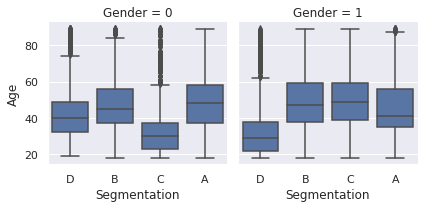

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




g = sns.FacetGrid(train_data_viz, col="Gender")
g.map(sns.boxplot, "Segmentation", "Age",)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


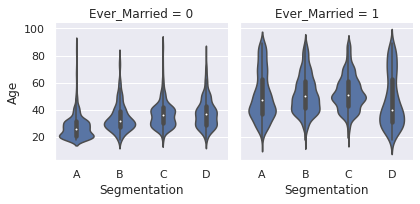

In [104]:
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.FacetGrid(train_data_viz, col="Ever_Married")
g.map(sns.violinplot, "Segmentation", "Age",)

['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing']


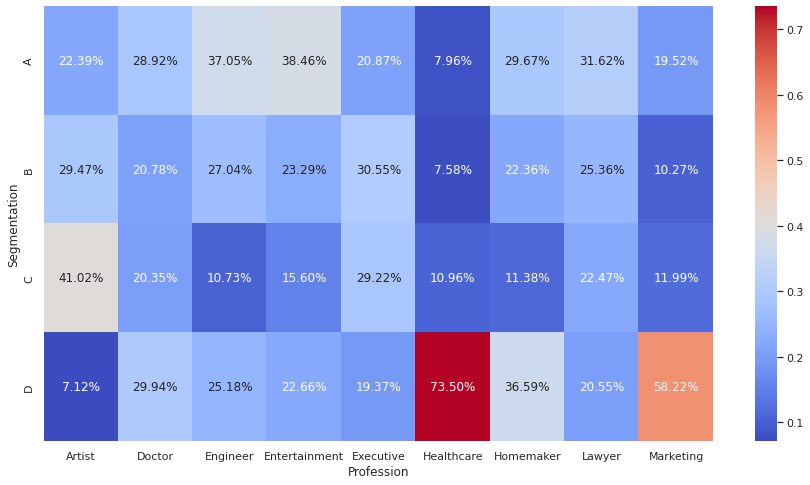

In [97]:
df = train_data_viz[["Profession","Segmentation"]].groupby(["Profession", "Segmentation"]).size().unstack(level=0)
print(train_data_viz["Profession"].unique())
for profession in train_data_viz["Profession"].unique():
    df[profession] = df[profession]/sum(df[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.2%')

[1 2 3]


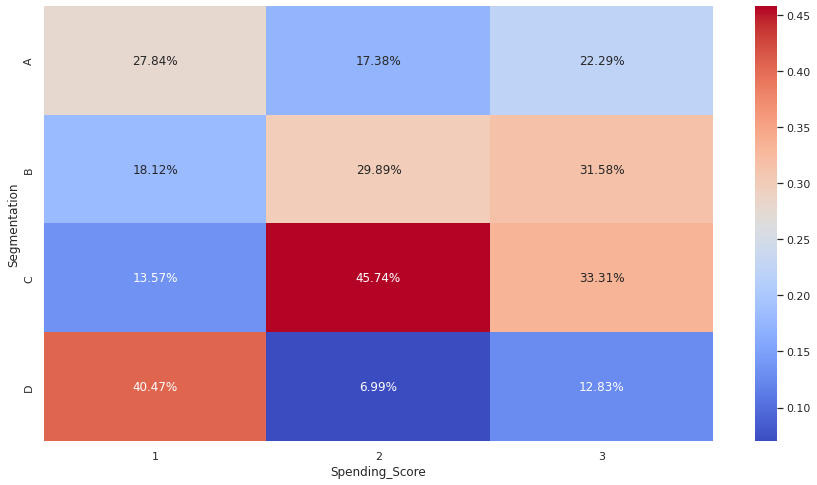

In [98]:
df = train_data_viz[["Spending_Score","Segmentation"]].groupby(["Spending_Score", "Segmentation"]).size().unstack(level=0)
print(train_data_viz["Spending_Score"].unique())
for profession in train_data_viz["Spending_Score"].unique():
    df[profession] = df[profession]/sum(df[profession])
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df,cmap='coolwarm',annot=True,fmt='.2%')

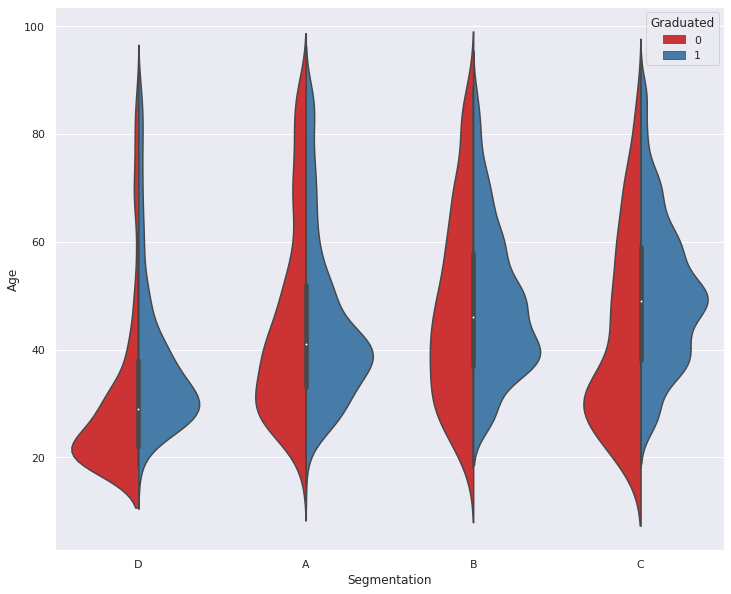

In [127]:
plt.figure(figsize=(12,10))
sns.violinplot(x='Segmentation',y="Age",data=train_data_viz, hue='Graduated', split='True', palette='Set1')

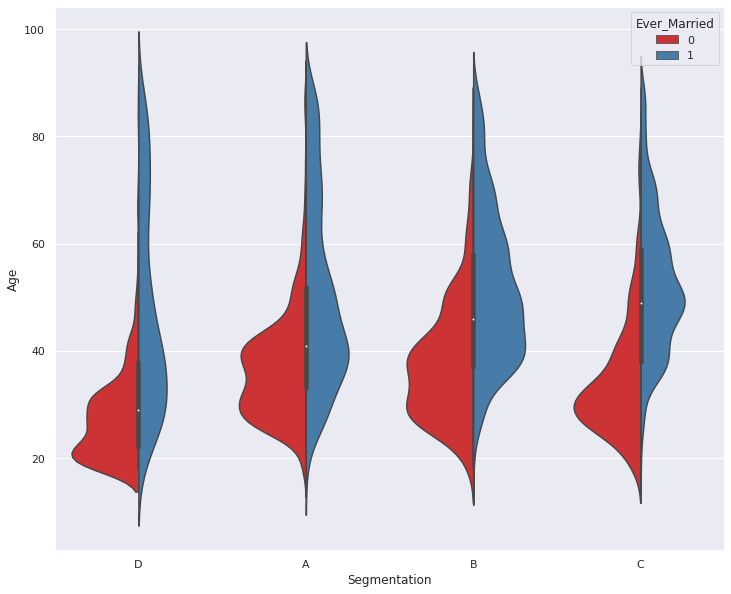

In [124]:
plt.figure(figsize=(12,10))
sns.violinplot(x='Segmentation',y="Age",data=train_data_viz, hue='Ever_Married', split='True', palette='Set1')

In [108]:
train_data.Work_Experience.value_counts()

1.0     3183
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

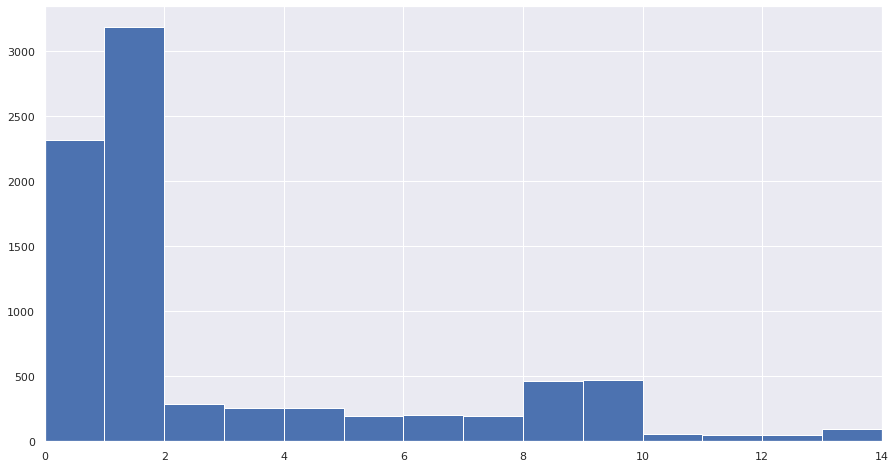

In [116]:
ax = train_data_viz.Work_Experience.hist(bins=14)
ax.margins(x=0)
plt.show()

In [121]:
train_data.Family_Size.value_counts()

2.0    2725
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

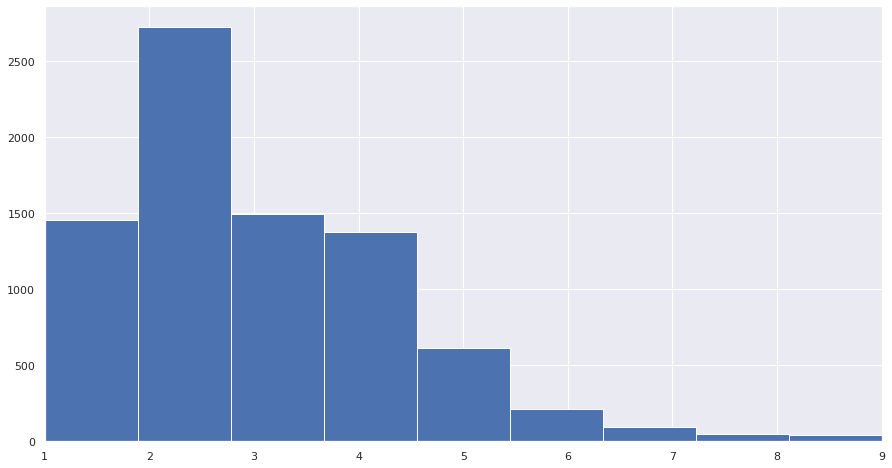

In [123]:
ax = train_data_viz.Family_Size.hist(bins=9)
ax.margins(x=0)
plt.show()

In [173]:
group1 = pd.Series(train_data.groupby((['Segmentation','Work_Experience'])).ID.agg('count'))
group1 = group1.to_frame()
stacked_bar = pd.pivot_table(group1,index='Work_Experience',columns='Segmentation')
stacked_bar.reset_index(inplace=True) 
stacked_bar.drop(['Work_Experience'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [174]:
for a in range(15):
    stacked_bar.iloc[a] = stacked_bar.iloc[a]/sum(stacked_bar.iloc[a])

In [175]:
stacked_bar = stacked_bar*100

In [176]:
stacked_bar

ID                                 
Segmentation          A          B          C          D
0             23.382226  24.072476  26.704055  25.841242
1             24.253849  23.971096  24.599434  27.175620
2             22.027972  20.979021  26.923077  30.069930
3             22.745098  23.529412  24.705882  29.019608
4             20.553360  26.482213  26.877470  26.086957
5             25.773196  22.680412  21.134021  30.412371
6             24.019608  22.058824  23.039216  30.882353
7             26.530612  19.897959  26.530612  27.040816
8             26.133909  17.494600  20.950324  35.421166
9             29.113924  19.620253  18.776371  32.489451
10            20.754717  18.867925  15.094340  45.283019
11            32.000000  14.000000  22.000000  32.000000
12            39.583333  25.000000   8.333333  27.083333
13            28.260870  26.086957  15.217391  30.434783
14            35.555556  15.555556   8.888889  40.000000

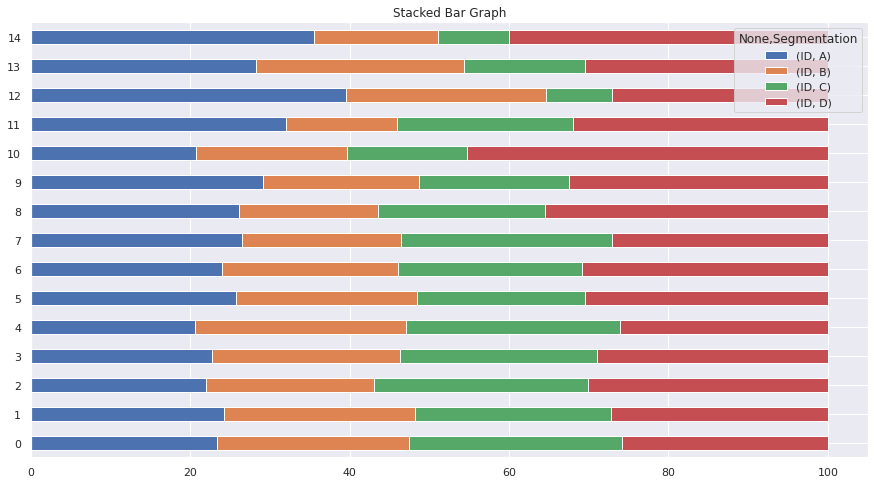

In [177]:
stacked_bar.plot(
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [178]:
group1 = pd.Series(train_data.groupby((['Segmentation','Family_Size'])).ID.agg('count'))
group1 = group1.to_frame()
stacked_bar = pd.pivot_table(group1,index='Family_Size',columns='Segmentation')
stacked_bar.reset_index(inplace=True) 
stacked_bar.drop(['Family_Size'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [181]:
for a in range(9):
    stacked_bar.iloc[a] = stacked_bar.iloc[a]/sum(stacked_bar.iloc[a])

stacked_bar = stacked_bar*100    

In [182]:
stacked_bar

ID                                 
Segmentation          A          B          C          D
0             38.609773  24.982794   9.635237  26.772195
1             26.275229  24.366972  30.018349  19.339450
2             21.108884  22.110888  26.118904  30.661323
3             15.881073  21.827411  28.353880  33.937636
4             13.235294  22.385621  24.346405  40.032680
5             16.509434  18.396226  20.283019  44.811321
6             27.083333  14.583333  14.583333  43.750000
7             14.000000  10.000000  26.000000  50.000000
8             25.000000   9.090909  25.000000  40.909091

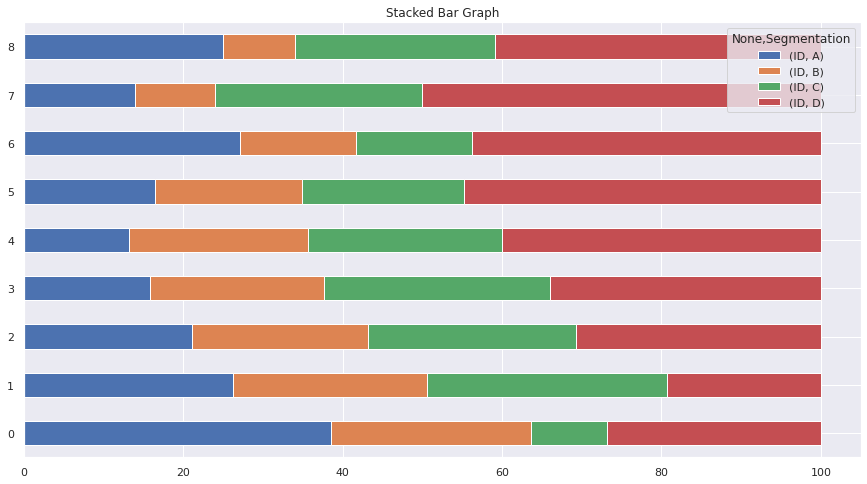

In [183]:
stacked_bar.plot(
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

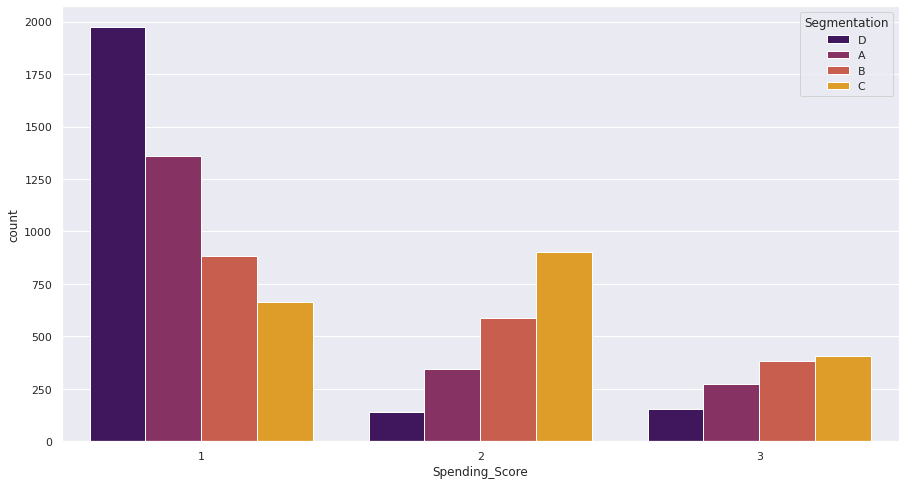

In [188]:
sns.countplot(data = train_data,x='Spending_Score',hue = 'Segmentation',palette='inferno')